In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../'

/Users/joe/Documents/boulot/git/homhots/HOTS


In [14]:
import numpy as np
import matplotlib.pyplot as plt

import os
from IPython.display import Image, SVG
from HOTS.ToolsMonitor import GenerateActivationMap, DisplayActivationMap
from HOTS.Event import Event, SimpleAlphabet
from HOTS.STS import STS
from HOTS.Layer import ClusteringLayer
from HOTS.ToolsMonitor import (
    DisplayImage,
    DisplaySurface3D,
    DisplaySurface2D,
    DisplayConvergence,
    DisplayPola
)
from HOTS.Tools import SaveObject, LoadObject
from HOTS.Classifier import Classifier
from HOTS.Network import Network
from HOTS.KmeansLagorce import KmeansLagorce

# Event based cameras

## Event-based Vision: A Survey (Gallego et al. 2020 -> on zotero group /)

"In contrast to standard cameras, which acquire full images at a rate specified by an external clock (e.g., 30 fps), event cameras, such as the Dynamic Vision Sensor (DVS), respond to **brightness changes** in the scene **asynchronously and independently for every pixel**. Thus, the output of an event camera is a variable datarate sequence of digital “events” or “spikes”, with each event representing a change of brightness (**log intensity**) of predefined magnitude at a pixel at a particular time."

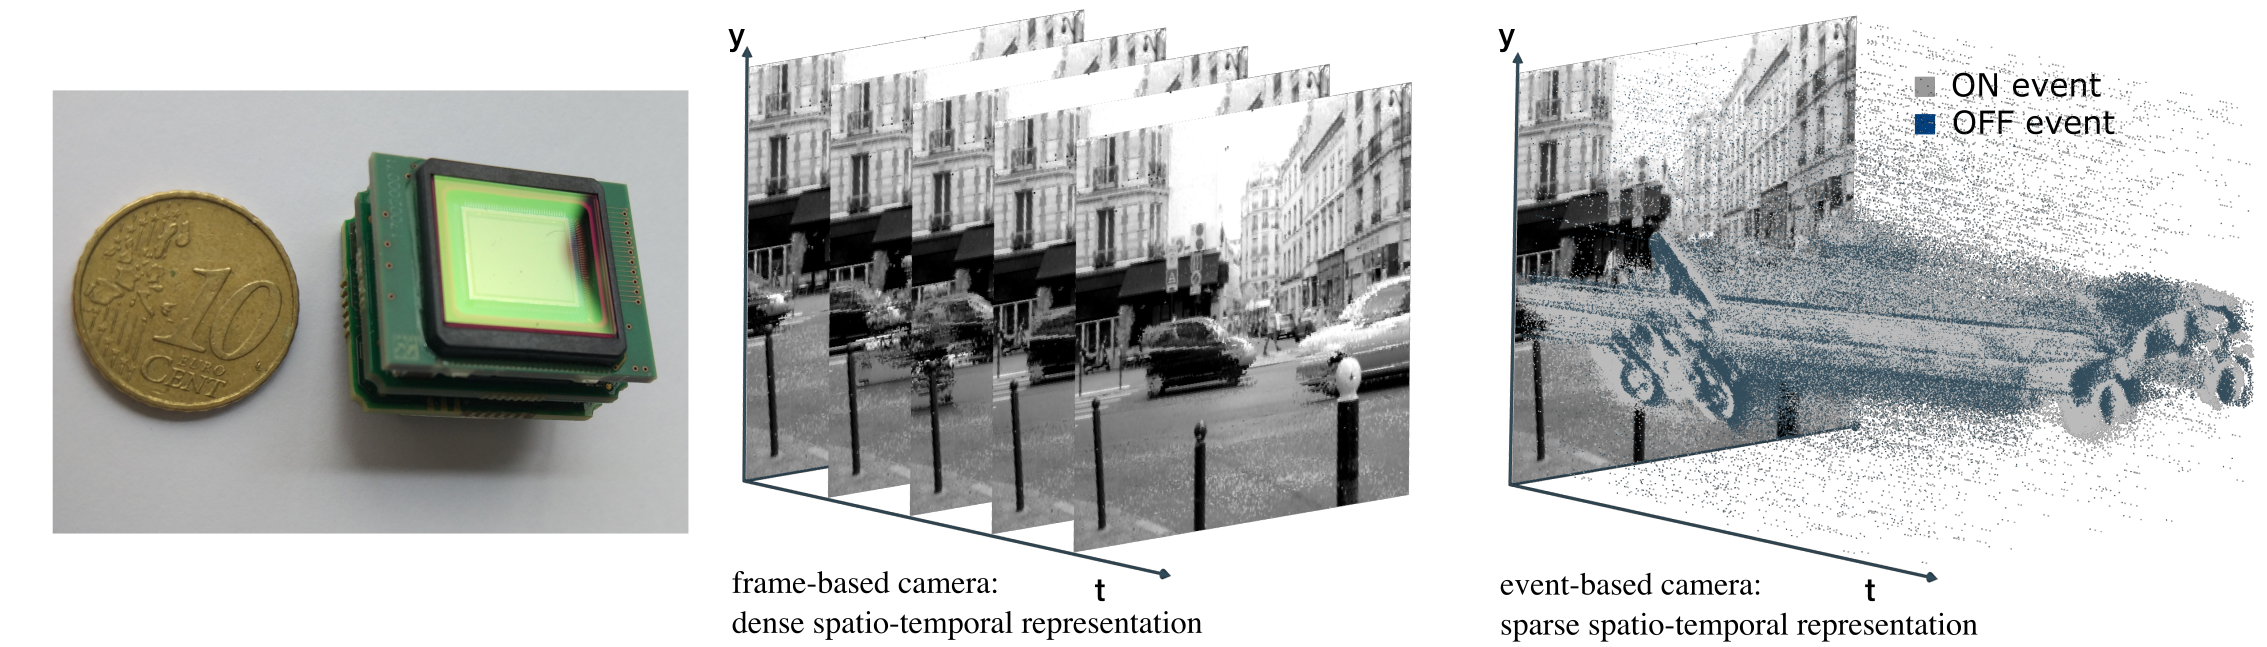

In [15]:
Image(filename='/Users/joe/Nextcloud/AgileNeuroBot/2020-05-20_AAPG2020_AgileNeuroBot/Fig/event_driven_computations.png')

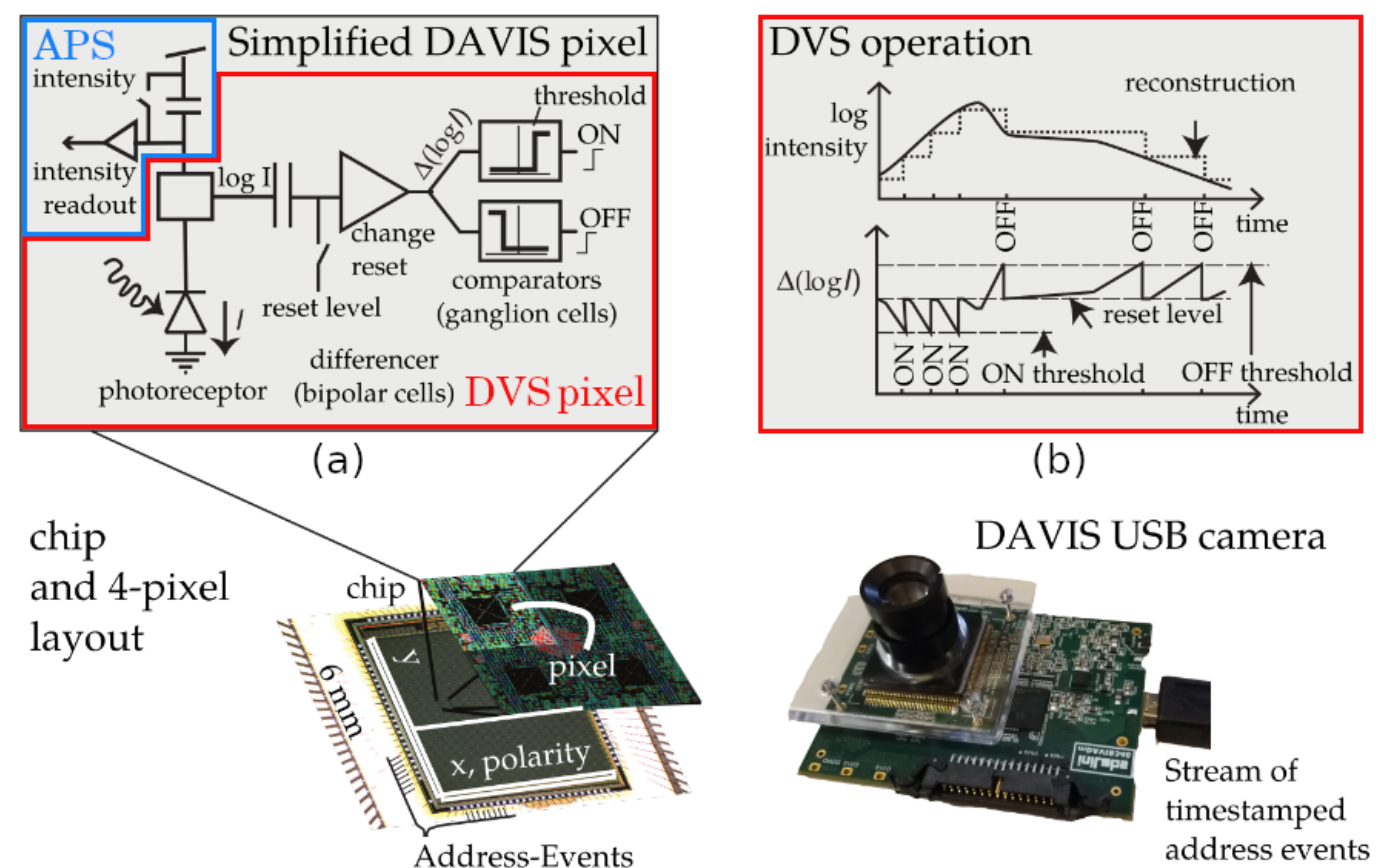

In [16]:
Image(filename='./notebooks/fig/dvssensor.png')

- Advantages and drawbacks


"The  incident  light  at  a  pixel  is  a  product  of  scene  illumination and surface reflectance. If illumination is approximately constant, a log intensity change signals a **reflectance change**. These  changes  in  reflectance  are  mainly  the  result of the **movement** of objects in the field of view. That is why the DVS brightness change events have a built-in **invariance to scene illumination**."

"Even  when  the  LED  brightness  is  reduced  by  a  factor  of 1000,  the  frequency  response  of  DVS  pixels  is  ten  times higher than the 30 Hz Nyquist frequency from a 60 fps image sensor." 

(also mention, HDR and the fact that it's asynchronous, low power)

### *Biological Connection*

"The DVS was inspired by the function of biological visual pathways, which have “transient” pathways dedicated to processing dynamic visual information in the so-called **“where” pathway**. [...] In humans, the transient pathway occupies about 30 % of the visual system. It starts with transient ganglion cells, which are mostly found in retina outside the fovea. It continues with magno layers of the thalamus and particular sublayers of area V1. It then continues to area MT and MST, which are part of the dorsal pathway where many motion selective cells are found. **The DVS corresponds to the part of the transient pathway(s) up to retinal ganglion cells.**"

In [39]:
# On garde ou pas sachant que c'est après V1 donc pas la partie concernée?

Image(url = 'https://i.stack.imgur.com/DL7SB.jpg')

# HOTS: A Hierarchy of Event-Based Time-Surfaces for Pattern Recognition (Lagorce et al. 2017 -> zotero group /classification/)

## Event list: $ev_i = [t_i,X_i,p_i]^T$ 
where $X_i=[x_i,y_i]^T, p_i=\{-1,+1\}$

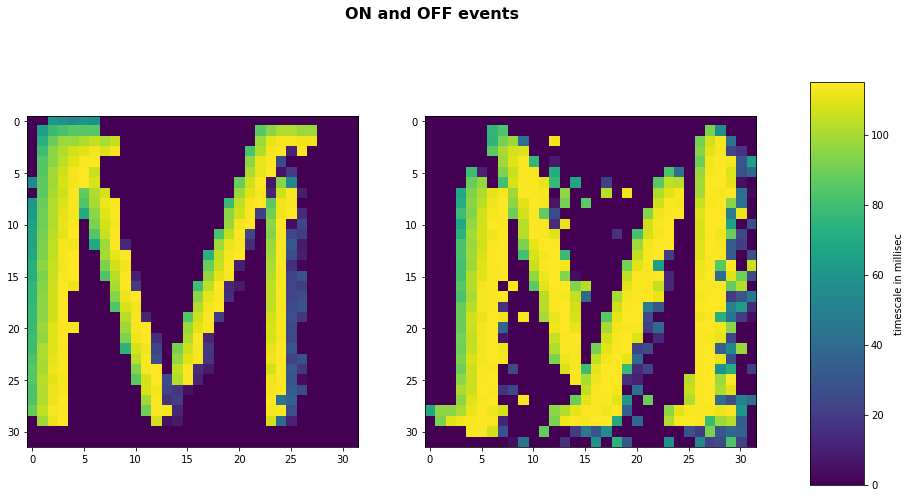

In [24]:
DataPath = "Data/alphabet_ExtractedStabilized.mat"
LabelPath = "Data/alphabet_label.pkl"
ImageSize = (32,32)
ListPolarities=[-1, 1]
nb_pola = 2
event0 = Event(ImageSize, ListPolarities)
event0.LoadFromMat("Data/alphabet_ExtractedStabilized.mat", image_number=15)
DisplayPola(event0, ImageSize, nb_pola)

## Time Surface

- Definition of a *time-context* around an incoming event $ev_i$: 
$$T_i(u,p) = max_{j\leq i}\{ t_j|X_j=X_i+u, p_j=p\}$$
where $u = [u_x,u_y]^T$ such that $u_x \in \{-R,...,R\}, u_y \in \{-R,...,R\}$

- Definition of the *time-surface*: 
$$S_i(u,p) = e^{-(t_i-T_i(u,p))/\tau}$$

Generation of SpatioTemporal Surface in ------ 0.92 s


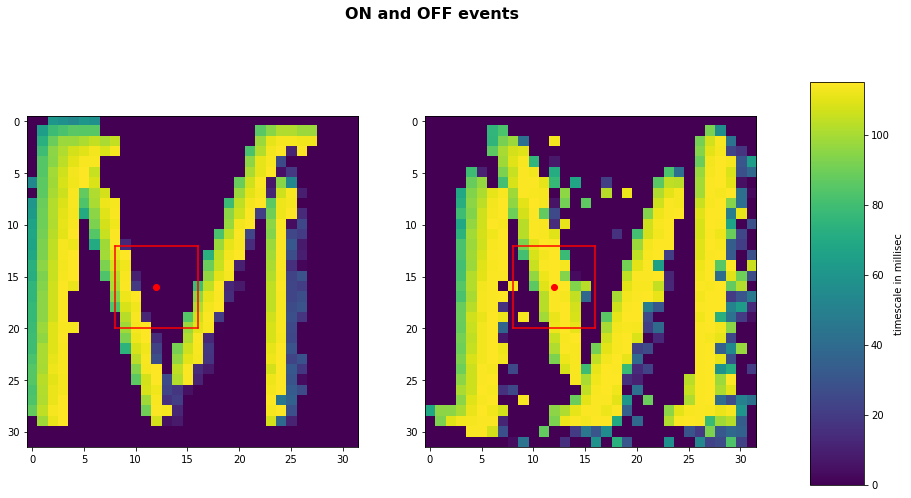

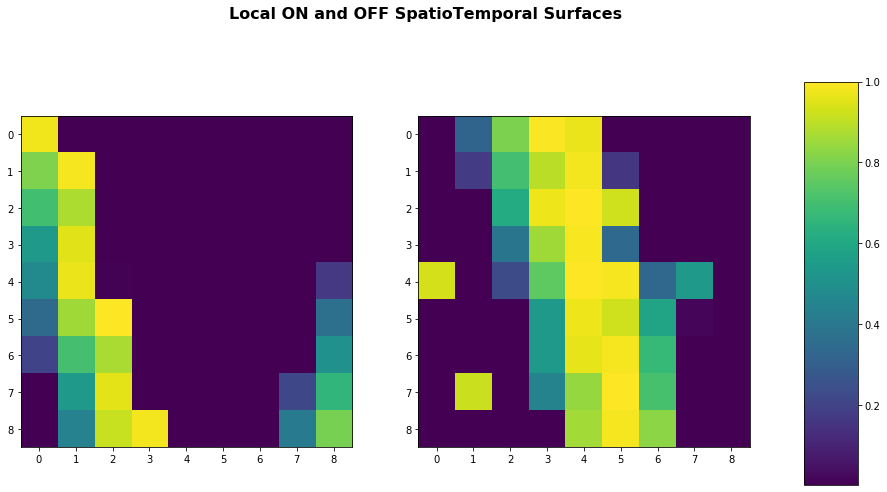

In [40]:
R = 4
tau = 0.02

SpTe = STS(tau, R, verbose=1, initial_time=0)
Surface = SpTe.create(event=event0, stop=None)

DisplayPola(event0, ImageSize, nb_pola, R, rect = True)

fig,axs = plt.subplots(1, 2, figsize=(15,8))
axs[0].imshow(np.exp(-SpTe.LocalTimeDiff[0, :, :]/tau))
br = axs[1].imshow(np.exp(-SpTe.LocalTimeDiff[1, :, :]/tau))
fig.suptitle('Local ON and OFF SpatioTemporal Surfaces', fontsize=16, fontweight='bold')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(br, cax=cbar_ax);

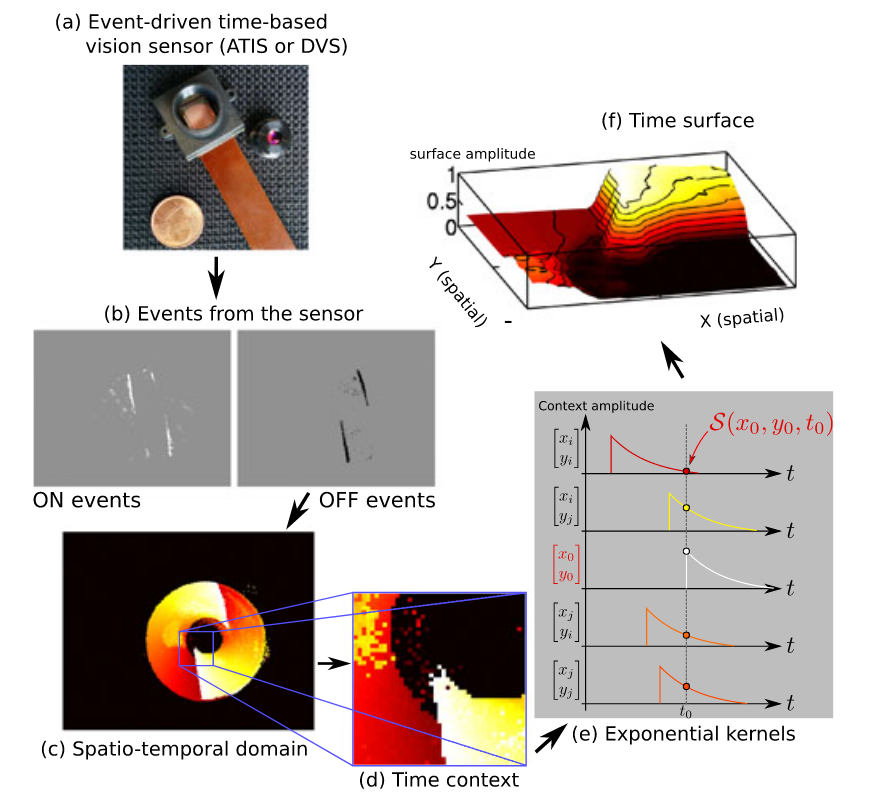

In [41]:
Image(filename='./notebooks/fig/channels.png')

### *Biological Connection*



## Hierarchical model



### Lagorce

### Maro

## Ajout d'une règle d'homéostasie

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


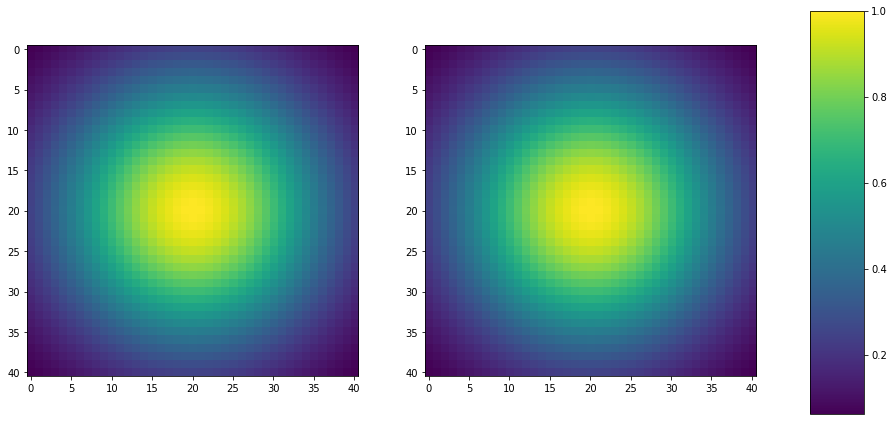